In [ ]:
from ultralytics import YOLO
import wandb
from wandb.integration.ultralytics import add_wandb_callback

# Load a model
model = YOLO(
    "weights/yolov8n-seg.pt", task="segment"
)  # load a pretrained model (recommended for training)

yaml_file = "configs/fashion_people.yml"
project_name = "human_parsing"
add_wandb_callback(model)

# Train the model
results = model.train(project=project_name, data=yaml_file, epochs=100, imgsz=1024)

# Finish the W&B run
wandb.finish()

In [ ]:
model_path = "/home/jordan/jd_segment_anything/runs/segment/train/weights/best.pt"
model = YOLO(model_path, task="segment")

image_dir = "/home/jordan/jd_segment_anything/datasets/person_seg/images/train"
images = [os.path.join(image_dir, file) for file in os.listdir(image_dir)]
image = random.choice(images)
image = Image.open(image)

result = model(image)

In [17]:
import requests
from PIL import Image 
from utils import *

url = "https://fashionista.com/.image/ar_4:3%2Cc_fill%2Ccs_srgb%2Cfl_progressive%2Cq_auto:good%2Cw_1200/MTYxNjk2NzIwOTkwNzc0NTc0/main-anok-yai-versace-leather-dress-spring-2019-milan-fashion-week.jpg"
image = Image.open(requests.get(url, stream=True).raw)
image = resize_preserve_aspect_ratio(image, 1024)
results = model(image)


0: 768x1024 1 hair, 1 face, 1 neck, 1 leg, 1 outfit, 4 persons, 9.1ms
Speed: 3.7ms preprocess, 9.1ms inference, 7.1ms postprocess per image at shape (1, 3, 768, 1024)


  0%|          | 0/1 [00:00<?, ?it/s]

In [36]:
import yaml 

with open(yaml_file, 'r') as file:
    data = yaml.load(file, Loader=yaml.FullLoader)

labels_dict = data.get('names')

In [37]:

result = results[0]
labels = result.boxes.cls 
labels = [int(label.item()) for label in labels]
labels = [labels_dict[label] for label in labels]
masks = result.masks.data
masks = [unload_mask(mask) for mask in masks]


hair


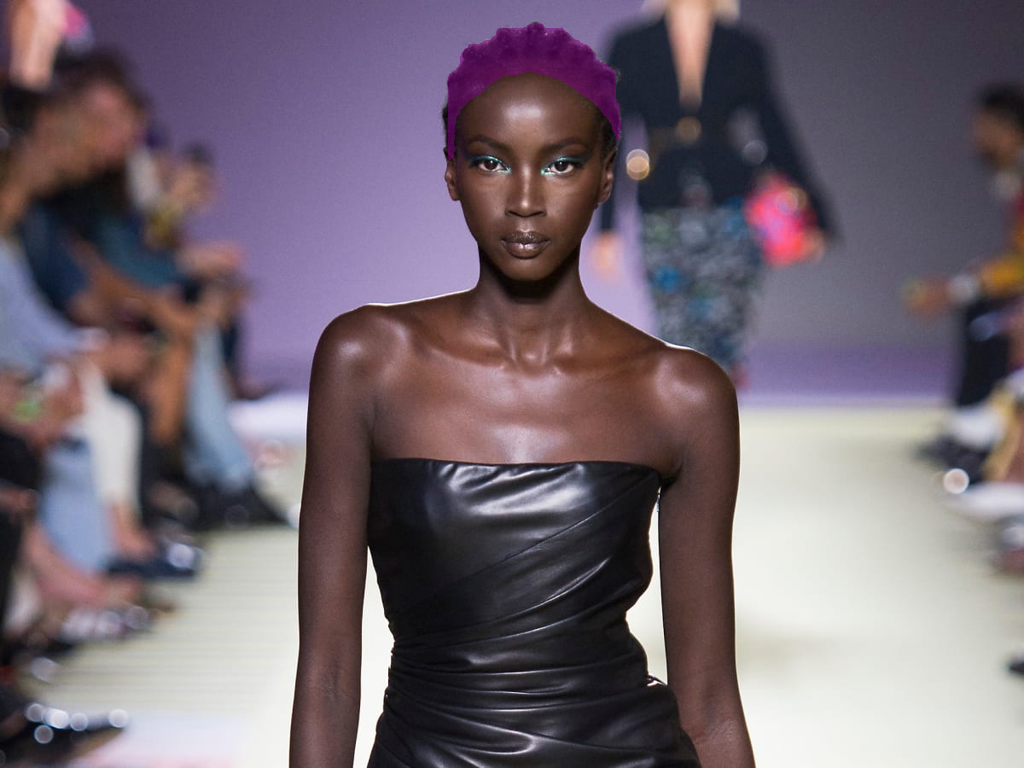

face


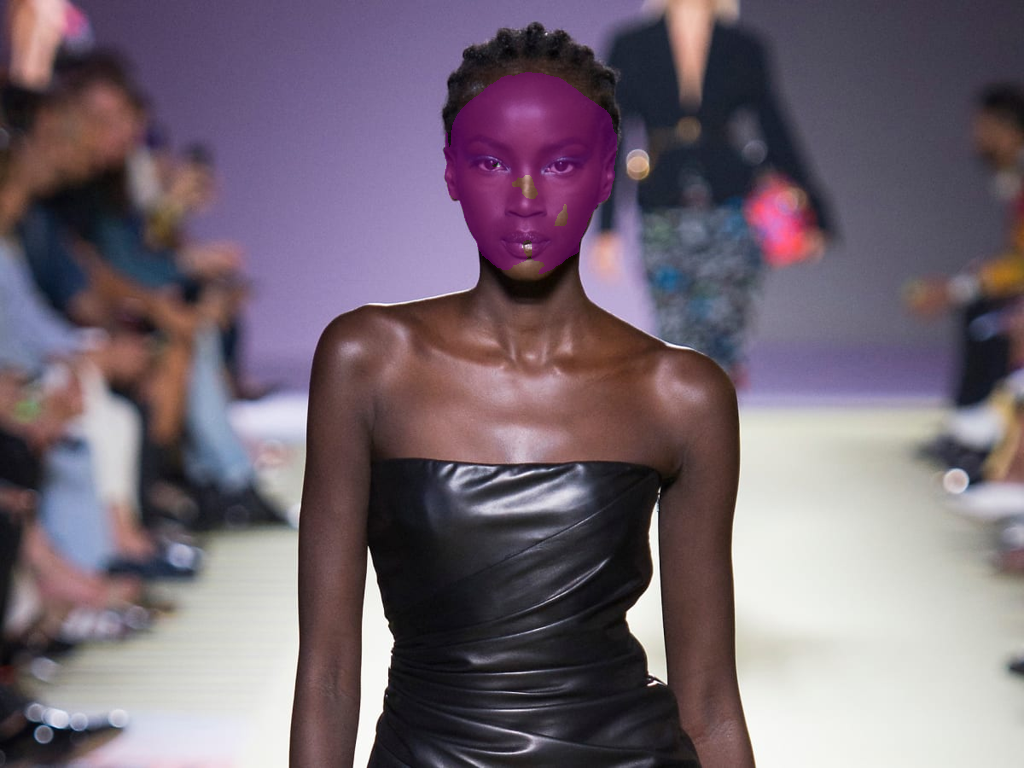

person


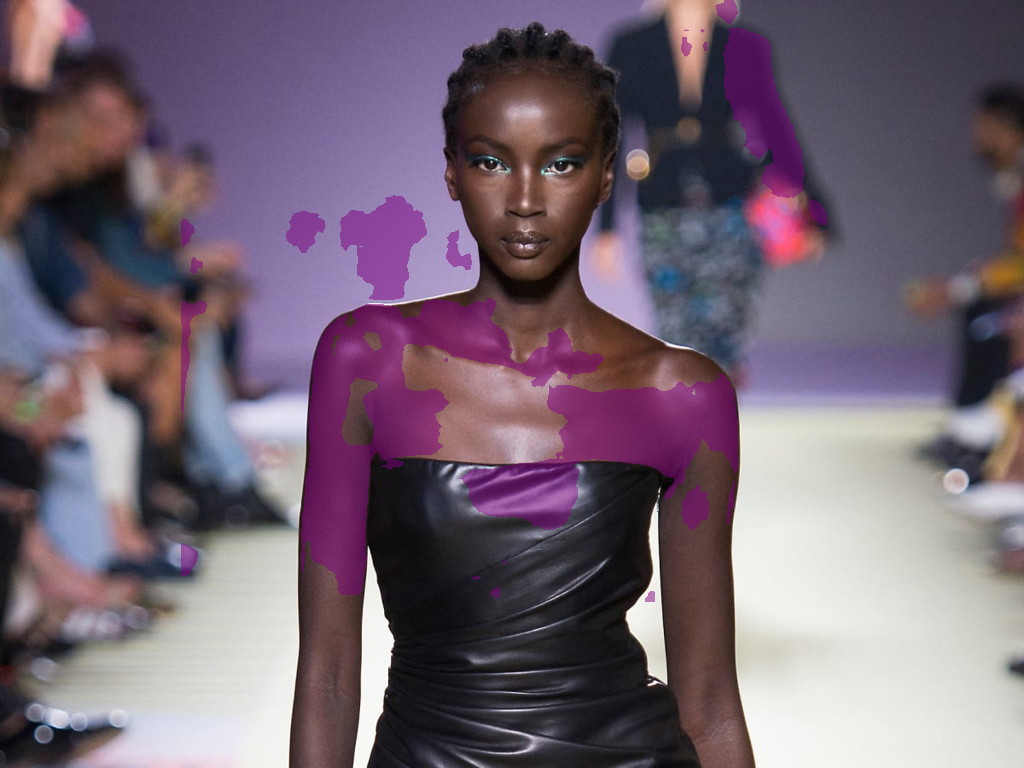

neck


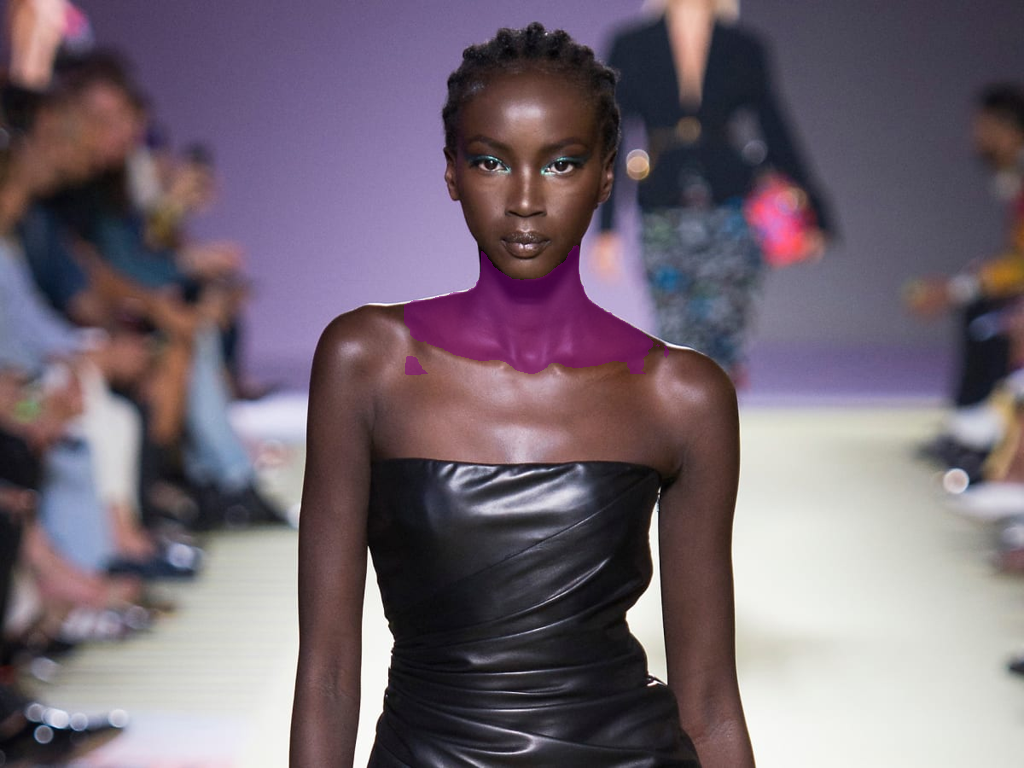

leg


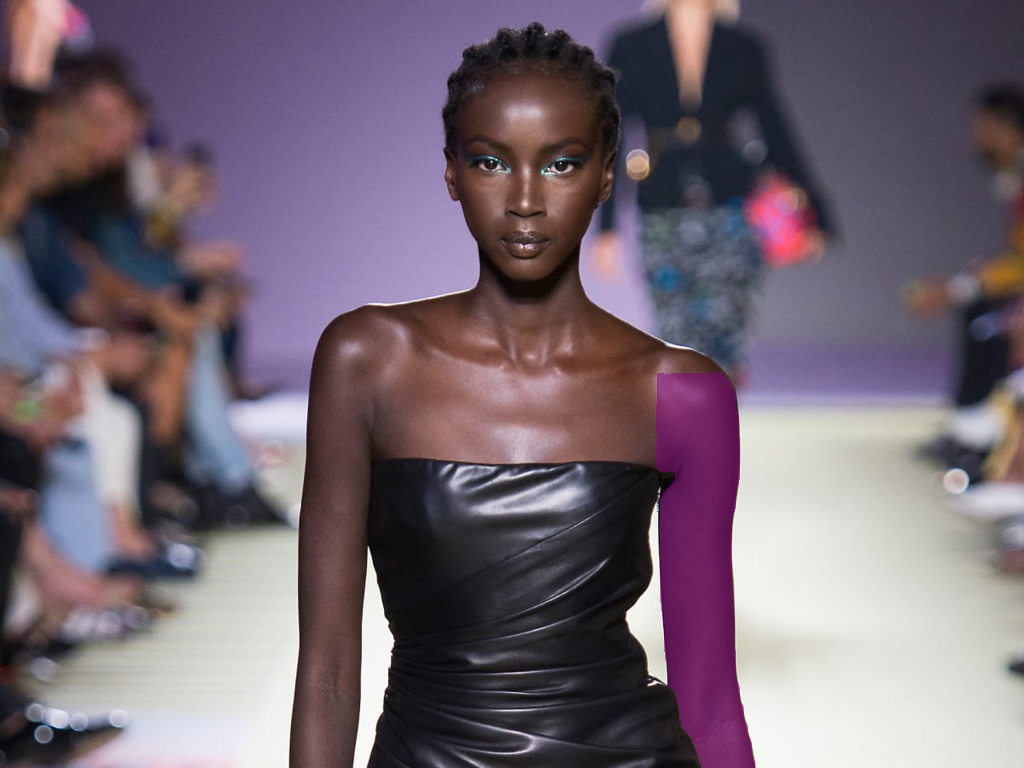

outfit


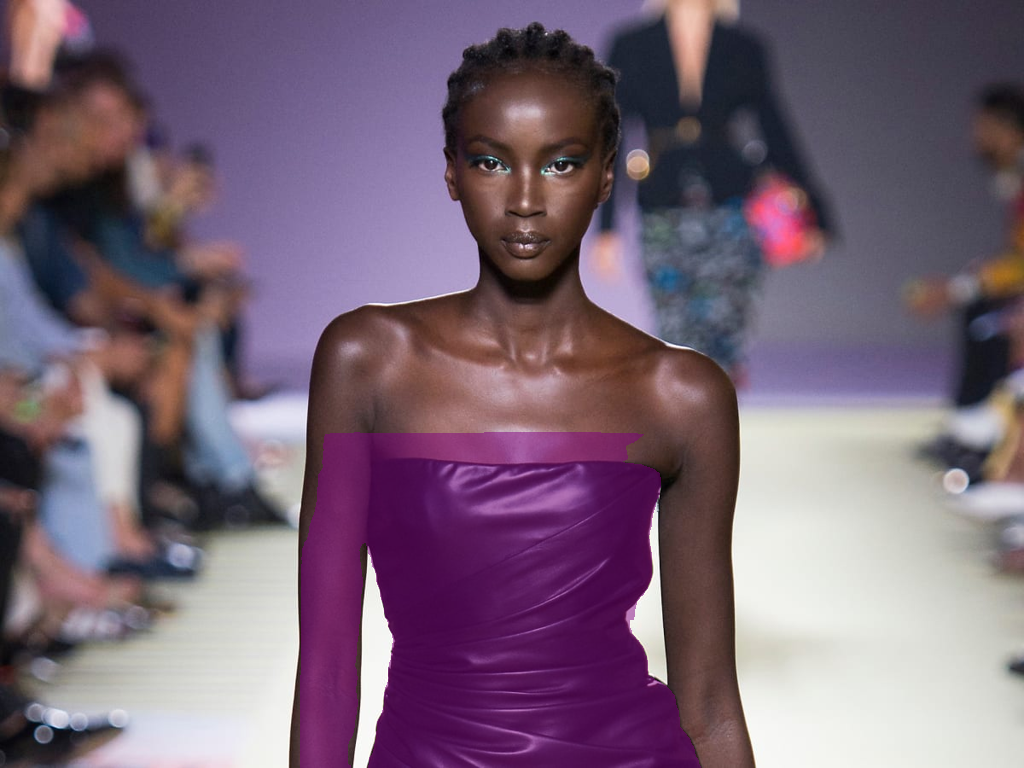

In [41]:
masks_dict = dict(zip(labels, masks))
for k, v in masks_dict.items():
    print(k)
    overlay = overlay_mask(image, v)
    display(overlay)